ta_top_post_master 의 owner_id, hashtag로 이루어진 데이터를 doc2vec으로 학습시키고자함.<br>
약 4700만 row를 학습시킨결과 owner_id가 한두번만 나오는것 다수 확인.<br>
학습에 영향을 적게 미치는 데이터 확인과 삭제필요.<br>
username 컬럼 대응.<br>


## import

In [1]:
%time
import pandas as pd

Wall time: 0 ns


## load

In [2]:
data1 = pd.read_csv("../data/instagram/post/ta_hashtag_0-10M.csv", header=0, encoding='utf-8')
data2 = pd.read_csv("../data/instagram/post/ta_hashtag_10-20M.csv", header=0, encoding='utf-8')
data3 = pd.read_csv("../data/instagram/post/ta_hashtag_20-30M.csv", header=0, encoding='utf-8')
data4 = pd.read_csv("../data/instagram/post/ta_hashtag_30-40M.csv", header=0, encoding='utf-8')
data5 = pd.read_csv("../data/instagram/post/ta_hashtag_40-48M.csv", header=0, encoding='utf-8')

In [3]:
# merge
data = pd.concat([data1,data2,data3,data4,data5])

In [4]:
data.shape

(48250602, 7)

In [5]:
data[:4]

,pm_owner_id,pm_id,pm_shortcode,pm_hashtag,pm_view_count,pm_like_count,pm_comment_count
0,4134297806,1928115241867045777,BrCCpjNgGuR,패션,0,420,172
1,596814953,1928108200588905562,BrCBDFgnoxa,패션,0,943,13
2,1383284232,1928034779094274576,BrBwWqag1IQ,"패션,데일리룩,셀스타그램,거울샷,셀카,셀피,아이폰,오오티디,니트,터틀넥니트,like...",0,358,13
3,3076185780,1928082021772864298,BrB7GIllqsq,"패션,commedesgarcons",0,605,21


## 전처리

### 1. 중복제거

In [6]:
tag_unduplicated = data.drop_duplicates(['pm_owner_id','pm_hashtag'])

In [7]:
tag_unduplicated.shape

(36503554, 7)

In [8]:
tag_unduplicated[tag_unduplicated['pm_owner_id']==2114112371]['pm_hashtag'][:5]

10514    동래꽃집,예쁜꽃다발,부산꽃배달,꽃선물,부산꽃집,사상꽃집,부산꽃다발,서면꽃집,예쁜꽃집...
10515    동래꽃집,예쁜꽃다발,부산꽃배달,부산꽃집,예쁜꽃집,부산꽃다발,사상꽃집,서면꽃집,해운대...
10517    동래꽃집,예쁜꽃집,꽃선물,부산꽃집추천,예쁜꽃다발,부산꽃배달,사상꽃집,부산꽃집,서면꽃...
10532    서면꽃집,예쁜꽃다발,부산꽃집,예쁜꽃집,부산꽃배달,사상꽃집,부산꽃다발,덕천꽃집,해운대...
36598    사상꽃집,예쁜꽃다발,부산꽃배달,꽃선물,부산꽃집,부산꽃다발,서면꽃집,예쁜꽃집,부산꽃집...
Name: pm_hashtag, dtype: object

### 2. id기준 최소 count 제거

In [9]:
tag_grouped = tag_unduplicated.groupby(['pm_owner_id'], axis=0).count()

In [11]:
tag_grouped[:5]

,pm_id,pm_shortcode,pm_hashtag,pm_view_count,pm_like_count,pm_comment_count
pm_owner_id,,,,,,
428,21,21,21,21,21,21
584,1,1,1,1,1,1
3118,64,64,64,64,64,64
3315,13,13,13,13,13,13
5444,4,4,4,4,4,4


In [12]:
tag_grouped.sort_values(by='pm_id', axis=0, ascending=False)[:5]

,pm_id,pm_shortcode,pm_hashtag,pm_view_count,pm_like_count,pm_comment_count
pm_owner_id,,,,,,
2114112371,10946,10946,10946,10946,10946,10946
1723230625,9751,9751,9751,9751,9751,9751
2116659183,9076,9076,9076,9076,9076,9076
2956362443,7893,7893,7893,7893,7893,7893
4878617570,5828,5828,5828,5828,5828,5828


In [13]:
tag_grouped.shape

(2965315, 6)

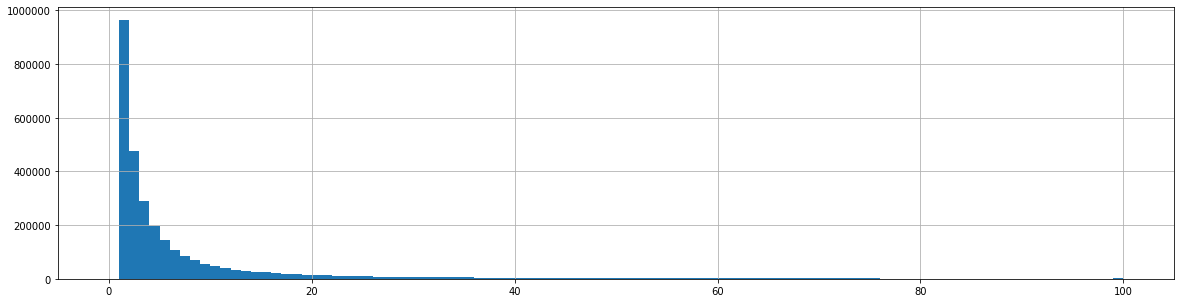

In [17]:
tag_grouped['pm_id'].hist(range=(0,100), bins=100, figsize=(20,5))

In [19]:
# delete list
tag_min_filter = tag_grouped.drop( tag_grouped[tag_grouped['pm_id']<15].index ) # 크롤링된 post갯수
tag_min_filter = tag_min_filter.reset_index()['pm_owner_id']

In [20]:
tag_filtered = tag_unduplicated[tag_unduplicated['pm_owner_id'].isin(tag_min_filter)]
tag_filtered[:5]

,pm_owner_id,pm_id,pm_shortcode,pm_hashtag,pm_view_count,pm_like_count,pm_comment_count
0,4134297806,1928115241867045777,BrCCpjNgGuR,패션,0,420,172
1,596814953,1928108200588905562,BrCBDFgnoxa,패션,0,943,13
2,1383284232,1928034779094274576,BrBwWqag1IQ,"패션,데일리룩,셀스타그램,거울샷,셀카,셀피,아이폰,오오티디,니트,터틀넥니트,like...",0,358,13
3,3076185780,1928082021772864298,BrB7GIllqsq,"패션,commedesgarcons",0,605,21
4,1683993105,1928088706242300522,BrB8nZ_A8pq,"패션,셀카,셀피,셀스타그램,모델,피팅모델,뷰티모델,데일리룩,데일리,소통,일상,팔로우...",0,414,28


In [21]:
tag_filtered.shape

(27825693, 7)

### 3. ia_channel_master
채널정보 기반 제거

In [22]:
loadPath = '../data/instagram/post/doc2vec_ta_hashtag_idx2name.txt'
channel_data = pd.read_csv(loadPath, header=None, sep="\t")
channel_data.columns = ['id', 'username', 'follower_cnt', 'following_cnt', 'media_cnt']

In [23]:
channel_data.shape

(32602655, 5)

In [24]:
# 최소값 제한
channel_filter = channel_data[(channel_data['media_cnt']>50) & (channel_data['follower_cnt']>100)]

In [25]:
channel_filter['id'][:5]

0    2138464578
1     471039796
2    2018370619
3    2136037831
4    1502061349
Name: id, dtype: int64

In [26]:
channel_filter['id'].shape

(3692172,)

In [27]:
# filtering
tag_channel_filtered = tag_filtered[tag_filtered['pm_owner_id'].isin(channel_filter['id'])]
tag_channel_filtered = tag_channel_filtered.reset_index(drop=True)

In [36]:
# 띄어쓰기 처리
tag_channel_filtered['pm_hashtag'] = tag_channel_filtered['pm_hashtag'].map(lambda x:x.replace(',',' '))

In [37]:
tag_channel_filtered[:5]

,pm_owner_id,pm_id,pm_shortcode,pm_hashtag,pm_view_count,pm_like_count,pm_comment_count
0,4134297806,1928115241867045777,BrCCpjNgGuR,패션,0,420,172
1,1383284232,1928034779094274576,BrBwWqag1IQ,패션 데일리룩 셀스타그램 거울샷 셀카 셀피 아이폰 오오티디 니트 터틀넥니트 like...,0,358,13
2,3076185780,1928082021772864298,BrB7GIllqsq,패션 commedesgarcons,0,605,21
3,7119582609,1928108695347124221,BrCBKSSgdf9,패션,0,226,17
4,6901441457,1928098827736537571,BrB-6sXFVnj,패션,0,584,22


In [38]:
tag_channel_filtered.shape

(20879572, 7)

### 4. NLP 

In [95]:
from konlpy.tag import Okt
okt = Okt()

In [96]:
# 띄어쓰기 처리
tag_channel_filtered[1] = tag_channel_filtered[1].map(lambda x:x.replace(',',' '))

In [97]:
tag_channel_filtered[:4]

,0,1
0,4134297806,패션
1,1383284232,패션 데일리룩 셀스타그램 거울샷 셀카 셀피 아이폰 오오티디 니트 터틀넥니트 like...
2,3076185780,패션 commedesgarcons
3,7119582609,패션


In [100]:
'''
태그뭉치를 형태소분석하는것은 불필요
1. 신조어가 많음
2. 처리속도 느림 primary tag에 적용하여 치환하는 방법해야할듯
3. 결과?
doc2vec을 태그 정보에 사용하는게 의미있는일인가? 하는 의문
태그는 post에 묶여있고 post가 id에 묶여있는데
잘 나뉘는 경우는 채널에서 굉장히 일관적인 포스트를 올리는 경우임
광고, 먹방, 육아, 신혼, 동물 같이 뚜렸하게 편중된 경향을 보이는 채널.
일상, 여행, 광범위한 포스팅을 하는 경우는 넓게 확산되는 경향
클러스터를 만들기위해선 채널 말고 포스트 기준으로 해야할듯
검색 : tag->post->channel

'''

%%time
# temp=['샤오미드리미v10p 무선청소기 가성비갑 가전제품추천 commedesgarcons 청소기돌리기 청결유지 클린존만들기 일상 데일리 청소부모드 commedesgarcons']
# okt.nouns(temp[0])



for i in tag_channel_filtered.index :
    if i > 10 : break
    print(tag_channel_filtered.loc[i, 1]);
    tag_channel_filtered.loc[i, 2] = ' '.join(okt.nouns(tag_channel_filtered.loc[i, 1]))


패션
패션 데일리룩 셀스타그램 거울샷 셀카 셀피 아이폰 오오티디 니트 터틀넥니트 likeforlikes 좋아요반사 선팔하면맞팔 맞팔 서울 selca selfie dailylook dailyfashion fff
패션 commedesgarcons
패션
패션
패션
상하복 육아맘
상하복 아동복 의정부아동복 민락2지구아동복 겨울아동복 예쁜아동복 겨울상하복 민락2지구 모토민락 소통해요
상하복 loungewear 이번크리스마스에는 실내복도_엣지있게 봉봉퐁당
스트릿패션 iphonexr rafsimons pumafenty ajobyajo vintage kappa nikoand guccigarden mygqlook
스트릿패션
Wall time: 7.72 s


In [40]:
tag_channel_filtered[:10]

,pm_owner_id,pm_id,pm_shortcode,pm_hashtag,pm_view_count,pm_like_count,pm_comment_count
0,4134297806,1928115241867045777,BrCCpjNgGuR,패션,0,420,172
1,1383284232,1928034779094274576,BrBwWqag1IQ,패션 데일리룩 셀스타그램 거울샷 셀카 셀피 아이폰 오오티디 니트 터틀넥니트 like...,0,358,13
2,3076185780,1928082021772864298,BrB7GIllqsq,패션 commedesgarcons,0,605,21
3,7119582609,1928108695347124221,BrCBKSSgdf9,패션,0,226,17
4,6901441457,1928098827736537571,BrB-6sXFVnj,패션,0,584,22
5,4029414583,1928042907967549090,BrByM9BHe6i,패션,0,295,52
6,2209059313,1928098221851458024,BrB-x4FhLno,상하복 육아맘,0,12,1
7,8615246965,1928137424207466357,BrCHsWIBc91,상하복 아동복 의정부아동복 민락2지구아동복 겨울아동복 예쁜아동복 겨울상하복 민락2지...,0,16,0
8,3174670038,1928038816984478019,BrBxRa_hjFD,상하복 loungewear 이번크리스마스에는 실내복도_엣지있게 봉봉퐁당,0,25,1
9,277413730,1927752532818754047,BrAwLcFhXn_,스트릿패션 iphonexr rafsimons pumafenty ajobyajo vi...,0,474,10


### 저장

In [39]:
savePath = '../data/instagram/post/doc2vec_ta_hashtag_filtered.txt'
tag_channel_filtered.to_csv(savePath, index=False, header=None, sep="\t")

In [32]:
%%time
temp = tag_channel_filtered.set_index('pm_hashtag').filter(like='패션', axis=0)

Wall time: 11.1 s


In [33]:
%%time
tempMask = tag_channel_filtered['pm_hashtag'].str.contains('패션|일상|ootd')

Wall time: 17.3 s


In [34]:
tag_channel_filtered[tempMask][:10]

,pm_owner_id,pm_id,pm_shortcode,pm_hashtag,pm_view_count,pm_like_count,pm_comment_count
0,4134297806,1928115241867045777,BrCCpjNgGuR,패션,0,420,172
1,1383284232,1928034779094274576,BrBwWqag1IQ,"패션,데일리룩,셀스타그램,거울샷,셀카,셀피,아이폰,오오티디,니트,터틀넥니트,like...",0,358,13
2,3076185780,1928082021772864298,BrB7GIllqsq,"패션,commedesgarcons",0,605,21
3,7119582609,1928108695347124221,BrCBKSSgdf9,패션,0,226,17
4,6901441457,1928098827736537571,BrB-6sXFVnj,패션,0,584,22
5,4029414583,1928042907967549090,BrByM9BHe6i,패션,0,295,52
9,277413730,1927752532818754047,BrAwLcFhXn_,"스트릿패션,iphonexr,rafsimons,pumafenty,ajobyajo,vi...",0,474,10
10,3980814570,1928076587162886431,BrB53DNl2Ef,스트릿패션,0,515,21
11,2999442358,1928017410993028782,BrBsZ7HAf6u,스트릿패션,0,426,53
22,8801957789,1927736295636010424,BrAsfKCAwW4,"주니어패션,뚜아멜라,디자이너브랜드,자체제작아동복,아동복,유아동복,감성아동복,이쁜아기...",0,45,5


In [35]:
temp.shape

(347286, 6)